# Dataset Terminology
 * LotFrontage: Linear feet of street connected to property
 * LotArea: Lot size in square feet
 * TotalBsmtSF: Total square feet of basement area
 * BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms
 * Fireplaces: Number of fireplaces
 * PoolArea: Pool area in square feet
 * GarageCars: Size of garage in car capacity
 * WoodDeckSF: Wood deck area in square feet
 * ScreenPorch: Screen porch area in square feet

In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
housing_price = pd.read_csv("/content/drive/MyDrive/coding/housing-classification-iter-0-2.csv")

In [ ]:
housing_price

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive
0,8450,65.0,856,3,0,0,2,0,0,0
1,9600,80.0,1262,3,1,0,2,298,0,0
2,11250,68.0,920,3,1,0,2,0,0,0
3,9550,60.0,756,3,1,0,3,0,0,0
4,14260,84.0,1145,4,1,0,3,192,0,0
...,...,...,...,...,...,...,...,...,...,...
1455,7917,62.0,953,3,1,0,2,0,0,0
1456,13175,85.0,1542,3,2,0,2,349,0,0
1457,9042,66.0,1152,4,2,0,1,0,0,1
1458,9717,68.0,1078,2,0,0,1,366,0,0


Let's explore the data and see the area and number of rooms of the expensive and inexpemsive houses.





In [ ]:
housing_expensive = housing_price.loc[housing_price["Expensive"] ==1]
housing_expensive

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive
6,10084,75.0,1686,3,1,0,2,255,0,1
11,11924,85.0,1175,4,2,0,3,147,0,1
13,10652,91.0,1494,3,1,0,3,160,0,1
20,14215,101.0,1158,4,1,0,3,240,0,1
25,14230,110.0,1566,3,1,0,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1426,10944,81.0,1223,3,2,0,2,171,0,1
1437,12444,96.0,1932,2,1,0,3,0,0,1
1442,11003,85.0,1017,3,1,0,3,168,0,1
1451,9262,78.0,1573,3,1,0,3,0,0,1


As we can see that the house which has large area or more than 2 rooms, have value 1 in coloumn expensive.
Therefore, considering house is expensive  = 1 and if not expensive = 0.

# Iteration 0
Intuition Model.
Let's check whether houses are expensive or not.
Intuition model is done to see whether our assumed rule(here, 1 is expensive house, 0 is inexpensive house) is related or not.
Using Scikit-Learn’s accuracy_score one can check how well our rule makes predictions on the test set.


In [ ]:
housing_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1460 non-null   int64  
 1   LotFrontage   1201 non-null   float64
 2   TotalBsmtSF   1460 non-null   int64  
 3   BedroomAbvGr  1460 non-null   int64  
 4   Fireplaces    1460 non-null   int64  
 5   PoolArea      1460 non-null   int64  
 6   GarageCars    1460 non-null   int64  
 7   WoodDeckSF    1460 non-null   int64  
 8   ScreenPorch   1460 non-null   int64  
 9   Expensive     1460 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 114.2 KB


In [ ]:
housing_price.isna().sum()

LotArea           0
LotFrontage     259
TotalBsmtSF       0
BedroomAbvGr      0
Fireplaces        0
PoolArea          0
GarageCars        0
WoodDeckSF        0
ScreenPorch       0
Expensive         0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbce7d67850>,
      dtype=object)

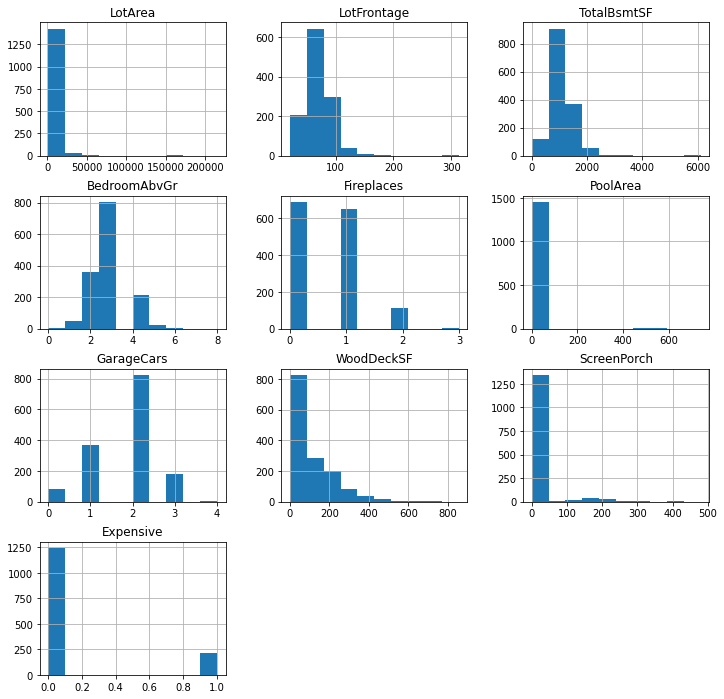

In [ ]:
housing_price.hist(figsize=(12,12))

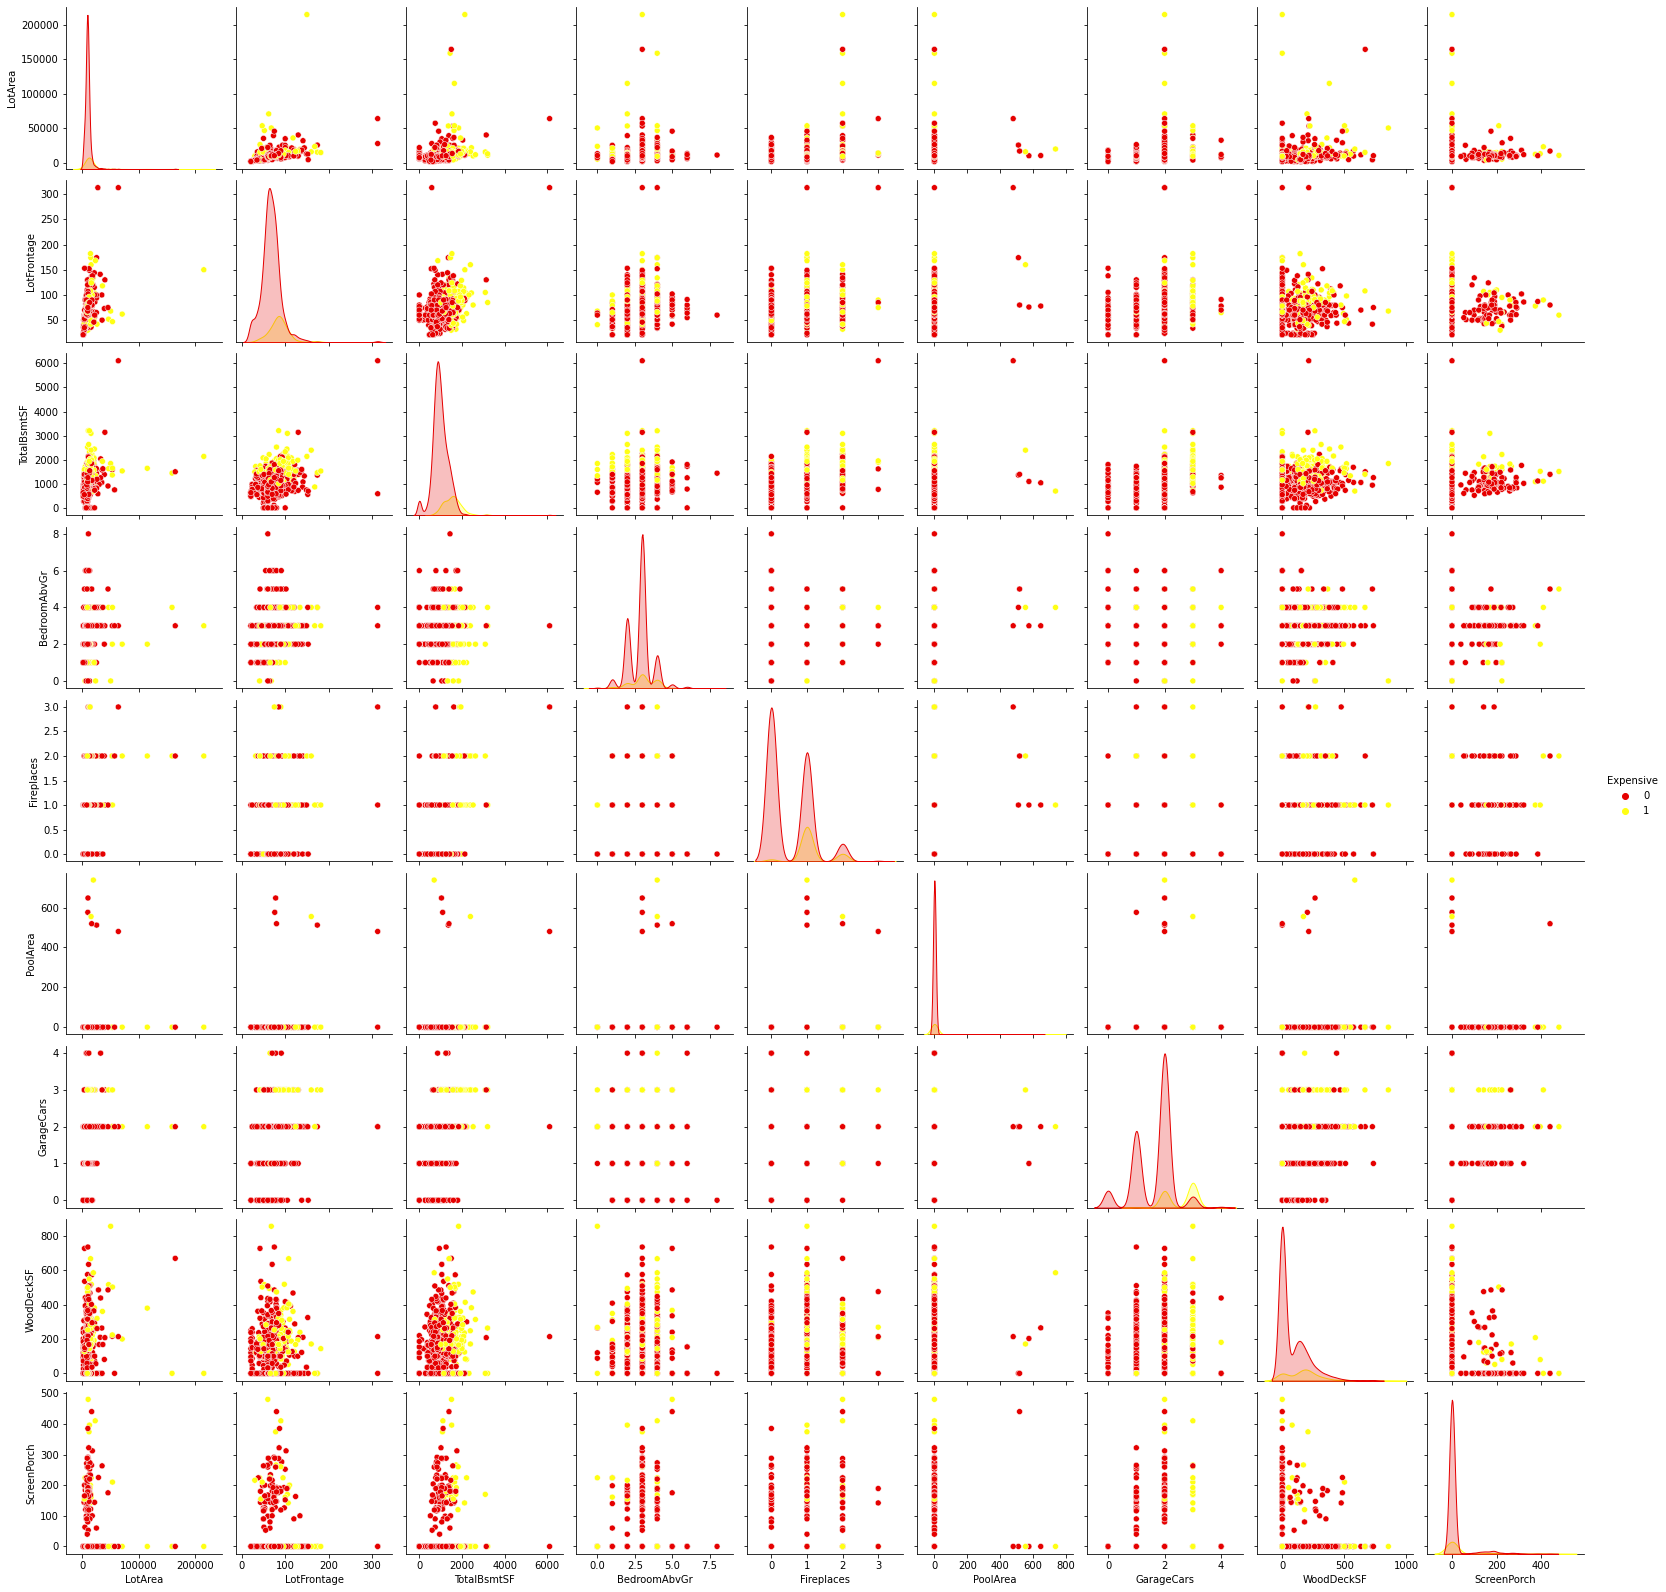

In [ ]:
colors = ['red', 'yellow']
sns.pairplot(housing_price, hue='Expensive',  palette=sns.xkcd_palette(colors))

In [ ]:
housing_price.describe()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,70.049958,1057.429452,2.866438,0.613014,2.758904,1.767123,94.244521,15.060959,0.148630
std,9981.264932,24.284752,438.705324,0.815778,0.644666,40.177307,0.747315,125.338794,55.757415,0.355845
min,1300.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7553.500000,59.000000,795.750000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,9478.500000,69.000000,991.500000,3.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000
75%,11601.500000,80.000000,1298.250000,3.000000,1.000000,0.000000,2.000000,168.000000,0.000000,0.000000
max,215245.000000,313.000000,6110.000000,8.000000,3.000000,738.000000,4.000000,857.000000,480.000000,1.000000


In [ ]:
# dropping the coloumns to make prediction datframe
X= housing_price.drop(["Expensive"], axis = 1)


In [ ]:
X

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
0,8450,65.0,856,3,0,0,2,0,0
1,9600,80.0,1262,3,1,0,2,298,0
2,11250,68.0,920,3,1,0,2,0,0
3,9550,60.0,756,3,1,0,3,0,0
4,14260,84.0,1145,4,1,0,3,192,0
...,...,...,...,...,...,...,...,...,...
1455,7917,62.0,953,3,1,0,2,0,0
1456,13175,85.0,1542,3,2,0,2,349,0
1457,9042,66.0,1152,4,2,0,1,0,0
1458,9717,68.0,1078,2,0,0,1,366,0


In [ ]:
# array for target feature
y= housing_price['Expensive']

In [ ]:
print(y.tolist())

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 

In [ ]:
# function for Write a function that takes a DataFrame of housing data as an input, and based on the rule you defined, outputs a list with predictions about whether a house is expensive or not (1 or 0).

# Test-Train split


In [ ]:
# splitting data into test and train set 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123000000)

In [ ]:
X_train.shape

(1168, 9)

In [ ]:
y_train

332     1
689     0
400     0
57      0
279     0
       ..
1220    0
679     0
747     1
1022    0
1339    0
Name: Expensive, Length: 1168, dtype: int64

In [ ]:
y_train.value_counts()

0    991
1    177
Name: Expensive, dtype: int64

In [ ]:
len(y_train)

1168

# For not expensive 

Let's assume all houses are not expensive(that is the value of expensive coloumn is 0)


In [ ]:
pred_nexpensive_train = pd.Series(0, index=range(1168)) # not expensive

In [ ]:
pred_nexpensive_train   # not expensive

0       0
1       0
2       0
3       0
4       0
       ..
1163    0
1164    0
1165    0
1166    0
1167    0
Length: 1168, dtype: int64

Now: how good are those predictions? We will compare them with the true values and find out the percentage of correctly predicted house price. This metric is called accuracy:

In [ ]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_true = y_train,
                                 y_pred = pred_nexpensive_train
                                 )

round(train_accuracy,3)      # not expensive

0.848

Right now we are getting 100% accuracy of our trainset, let's test it out on test set


In [ ]:
len(y_test)   # not expensive

292

In [ ]:
pred_nexpensive_test = pd.Series(0, index=range(292))   # not expensive

In [ ]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_true = y_test,
                                 y_pred = pred_nexpensive_test
                                 )

round(train_accuracy,3)     # not expensive

0.863

# For expensive houses

In [ ]:
pred_expensive_train = pd.Series(1, index=range(1168)) # expensive

In [ ]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_true = y_train,
                                 y_pred = pred_expensive_train
                                 )

round(train_accuracy, 3)      # expensive

0.152

In [ ]:
pred_expensive_test = pd.Series(1, index=range(292)) # expensive

In [ ]:
from sklearn.metrics import accuracy_score

test_accuracy = accuracy_score(y_true = y_test,
                                 y_pred = pred_expensive_test
                                 )

round(test_accuracy, 3)      # not expensive

0.137

# Iteration -1, Train a Desicion trees

In [ ]:
# can be used when there are coloumns containing strings/boolean
# X_num = X.select_dtypes(include="number")

# X_num.shape

Imputing missing values


Make sure fit the transformer to train data and not fit it to the test data. The transformations on the test set should be based on what we have seen in the train set. Remember that the test set is there just to see how the model would do in a production environment: we have to imagine that each individual observation on the test set comes as an isolated loan to a model. The model looks for NaNs and when it finds one, imputes the mean from the data we have used in the training phase.

In [ ]:
from sklearn.impute import SimpleImputer

# initialize
my_imputer = SimpleImputer(strategy='mean')

# fit
my_imputer.fit(X_train)

# transform train 
X_imputed_train = my_imputer.transform(X_train)

In [ ]:
X_imputed_train

array([[1.0655e+04, 8.5000e+01, 3.2060e+03, ..., 3.0000e+00, 0.0000e+00,
        0.0000e+00],
       [7.5770e+03, 6.1000e+01, 1.3620e+03, ..., 2.0000e+00, 1.9200e+02,
        0.0000e+00],
       [1.4963e+04, 3.8000e+01, 1.2600e+03, ..., 2.0000e+00, 1.2000e+02,
        2.2400e+02],
       ...,
       [1.1700e+04, 6.5000e+01, 1.2400e+03, ..., 4.0000e+00, 1.8100e+02,
        0.0000e+00],
       [9.4390e+03, 5.2000e+01, 9.1200e+02, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [9.5600e+03, 1.2000e+02, 8.6400e+02, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00]])

# Implement a Decision Tree (numerical features + missing values imputed)

In [ ]:
# 1. import the model
from sklearn.tree import DecisionTreeClassifier

# 2. initialize the model (optional: give some parameters)
my_tree = DecisionTreeClassifier()

# 3. fit the model to the train data
my_tree.fit(X = X_imputed_train, 
            y = y_train)

DecisionTreeClassifier()

# Check the performance

In [ ]:
y_pred_tree_train = my_tree.predict(X_imputed_train)

In [ ]:
y_pred_tree_train

array([1, 0, 0, ..., 1, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score

train_accuracy1 = accuracy_score(y_true = y_train,
                                 y_pred = y_pred_tree_train
                                 )

round(train_accuracy1, 5)

1.0

Text(0.5, 1.0, 'Confusion matrix')

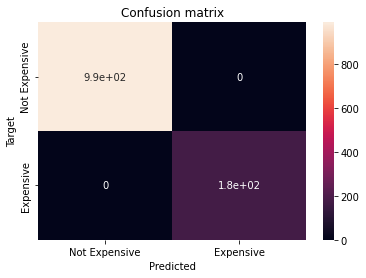

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_pred_tree_train)
sns.heatmap(cm, annot=True, xticklabels=['Not Expensive', 'Expensive'], 
            yticklabels=['Not Expensive', 'Expensive'])
plt.xlabel('Predicted')
plt.ylabel('Target')
plt.title('Confusion matrix')

The model seems to work REALLY well. Suspiciously well, even. Remember that the model has been trained using the train set and we have now checked its accuracy on the very same train set. The real evaluation will come from the test set.

## Check accuracy for the test set

Is the model able to generalize? Is it able to make predictions on data it has not "seen" before?

# Transform the test set

The test set already contains only numerical features, but we still need to impute the missing values with the "imputer" we already created and fitted on the train set.

Remember: transformers only have to be fitted to the train set. Then, they are used to transform both the train and the test set.

In [ ]:
# impute NaN's to test set
X_imputed_test = my_imputer.transform(X_test)

In [ ]:
y_pred_tree_test = my_tree.predict(X_imputed_test)

In [ ]:
y_pred_tree_test

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score

test_accuracy1 = accuracy_score(y_true = y_test,
                                 y_pred =y_pred_tree_test
                                 )

round(test_accuracy1, 5)

0.89041

Text(0.5, 1.0, 'Confusion matrix')

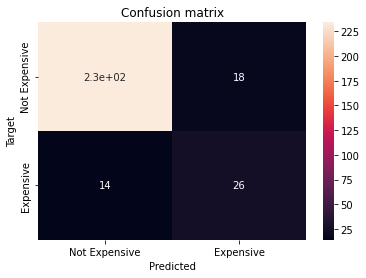

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_tree_test)
sns.heatmap(cm, annot=True, xticklabels=['Not Expensive', 'Expensive'], 
            yticklabels=['Not Expensive', 'Expensive'])
plt.xlabel('Predicted')
plt.ylabel('Target')
plt.title('Confusion matrix')

In [ ]:
30/2456

0.012214983713355049

This accuracy is even lower than some of our intuition-based models...

Our model has a **very high variance**: the difference between train and test set is huge. We can also say that our model suffers from **overfitting**: it has captured patterns in the training set that were not present in the testing set (they were mere "noise").

We will need to improve the model.

### Plotting desicion tree

**Class Names**: Names of **each of the target classes in ascending numerical order**. Only relevant for classification and not supported for multi-output. If True, shows a symbolic representation of the class name.

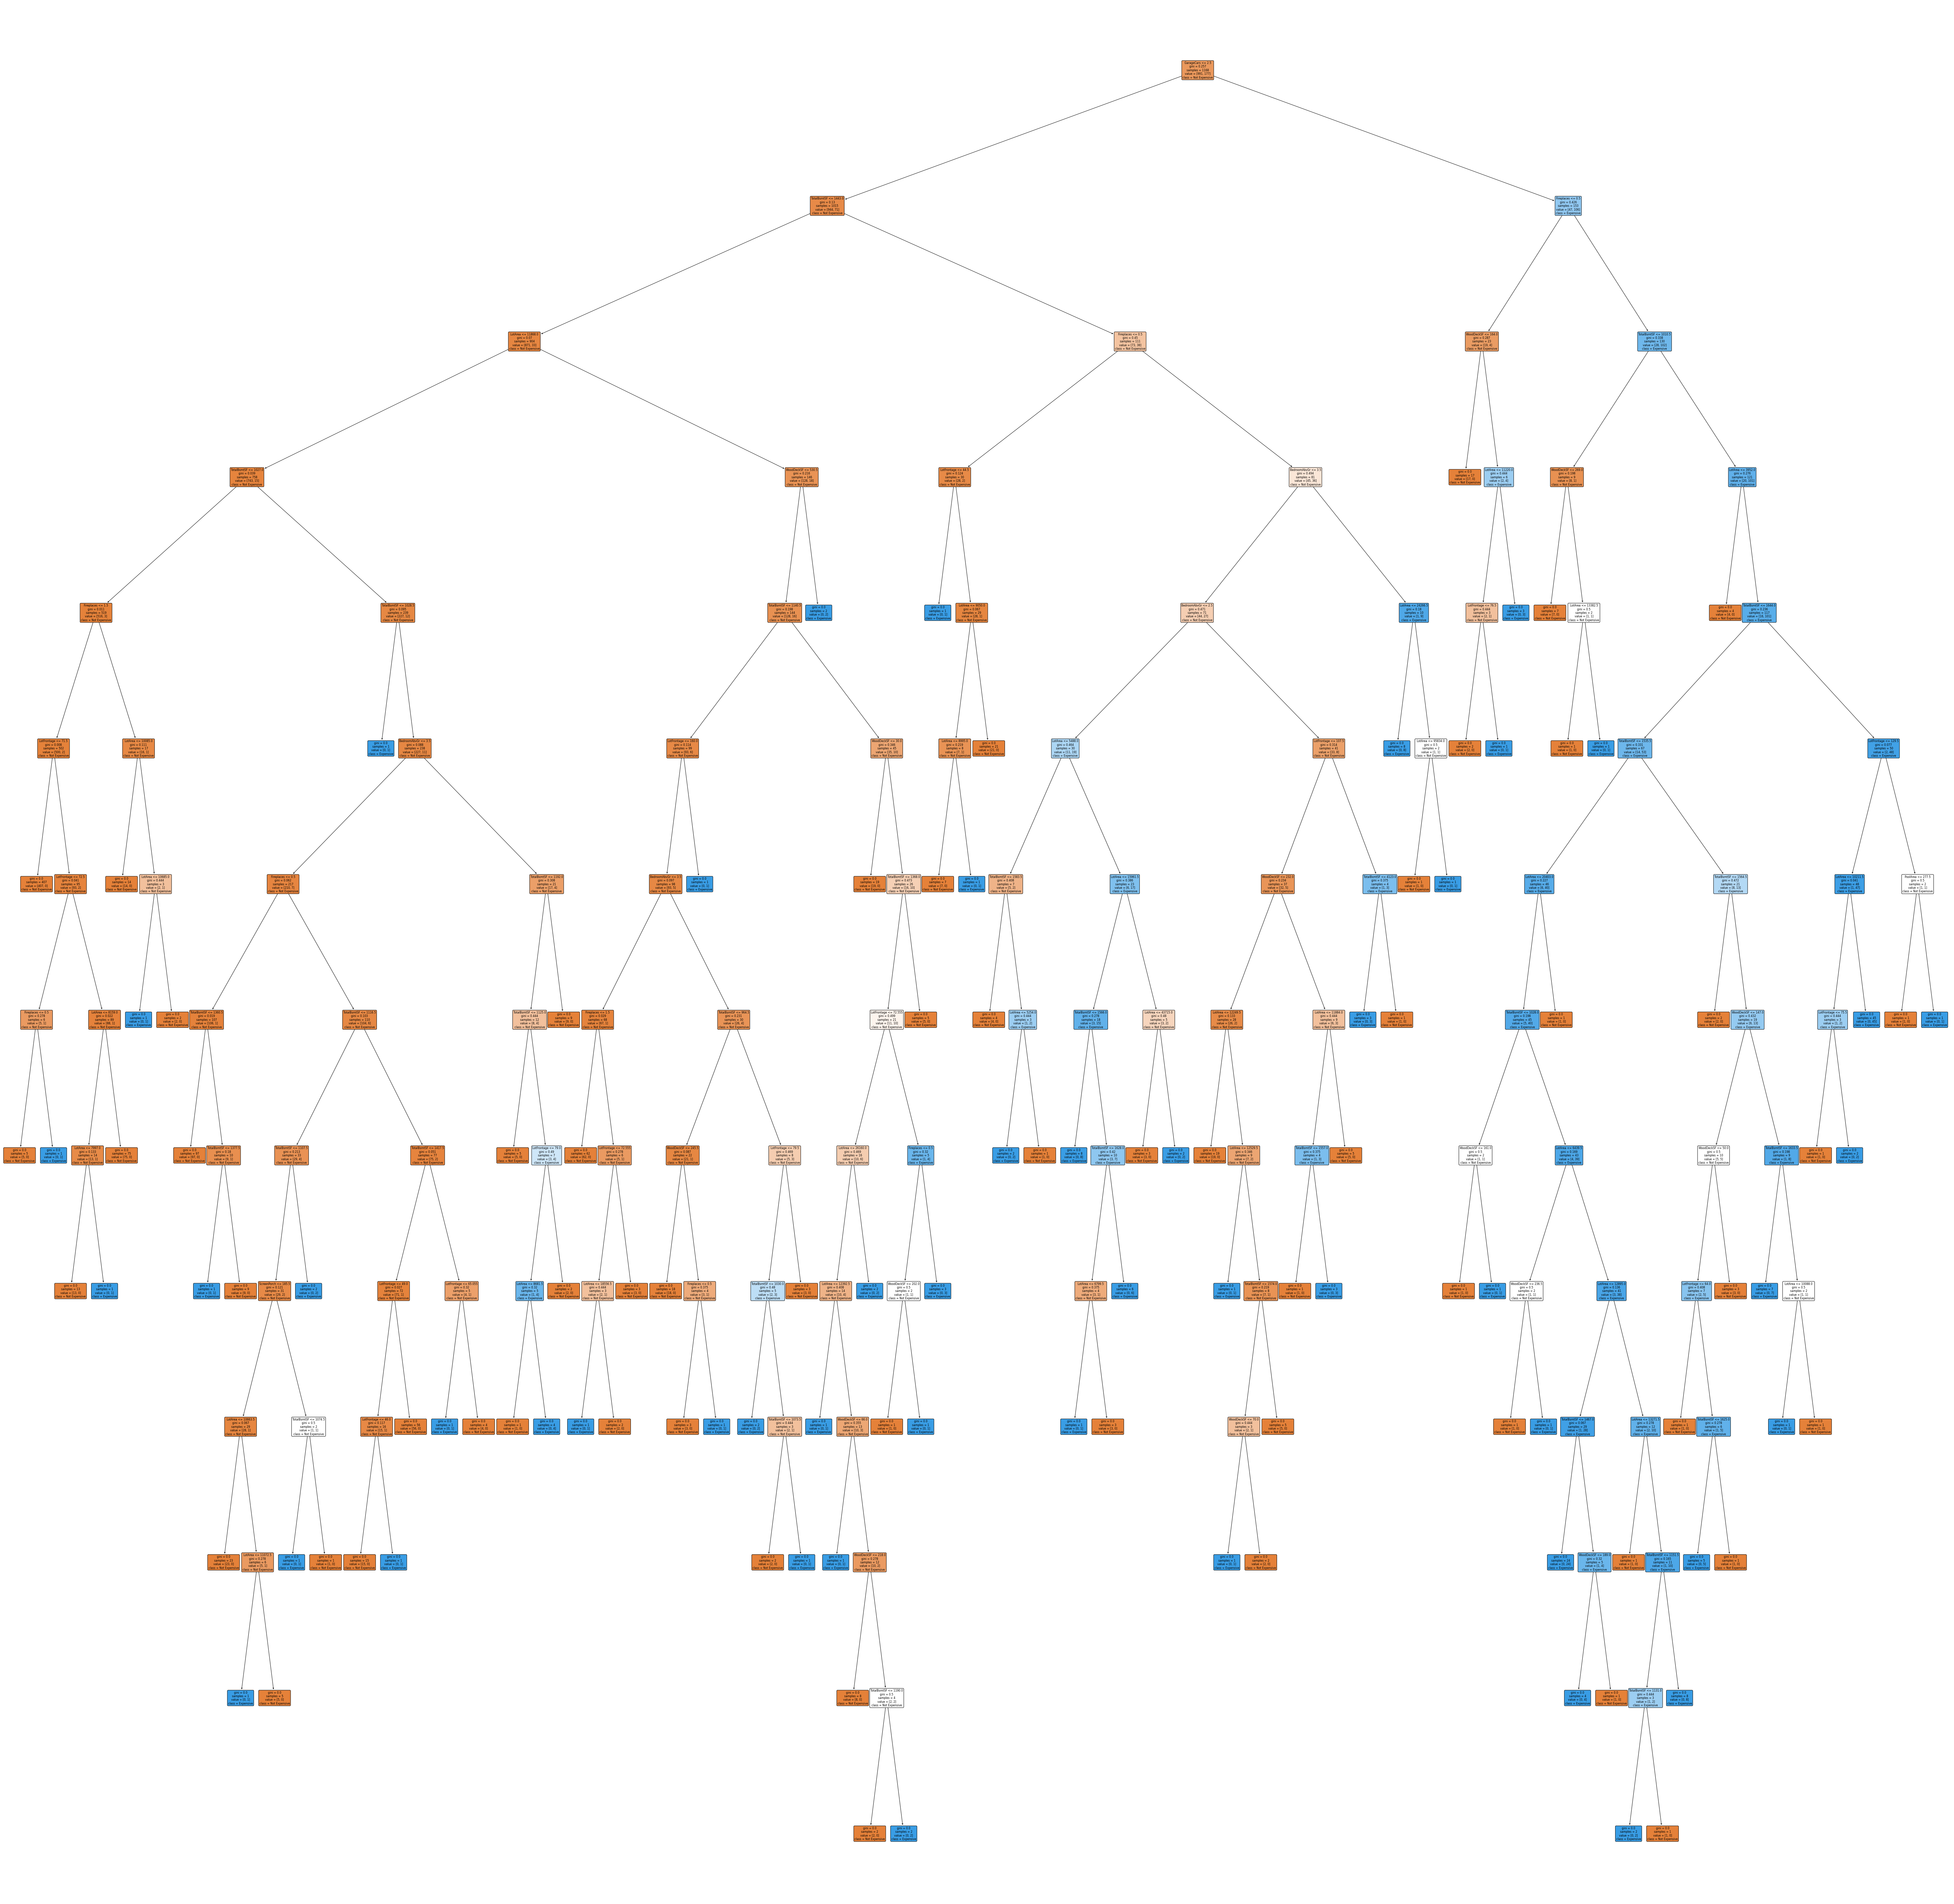

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(100,100))

plot_tree(
     my_tree,
     filled=True, 
     rounded=True, 
     class_names=['Not Expensive','Expensive'], 
     feature_names=X.columns
     );

graphviz export of the above tree trained on the entire dataset; the results are saved in an pdf output file

In [ ]:
from sklearn import tree
import graphviz 
dot_data = tree.export_graphviz(my_tree, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("X")

'X.pdf'

# Pruning the tree
Our current tree is too big to distinguish what's going on. It has dozens, maybe hundreds of rules. In other words, our model is very complex, which is a common characteristic of models that suffer from overfitting.

To reduce the complexity (the size) of the tree and prevent overfitting, we can play with the hyperparameters of the tree. It's a process known as "pruning" the tree.

In [ ]:
# 1. import the model
from sklearn.tree import DecisionTreeClassifier

# 2. initialize the model (optional: give some parameters)
my_tree = DecisionTreeClassifier(max_depth=4, splitter="best")

# 3. fit the model to the train data
my_tree.fit(X = X_imputed_train, 
            y = y_train)

DecisionTreeClassifier(max_depth=4)

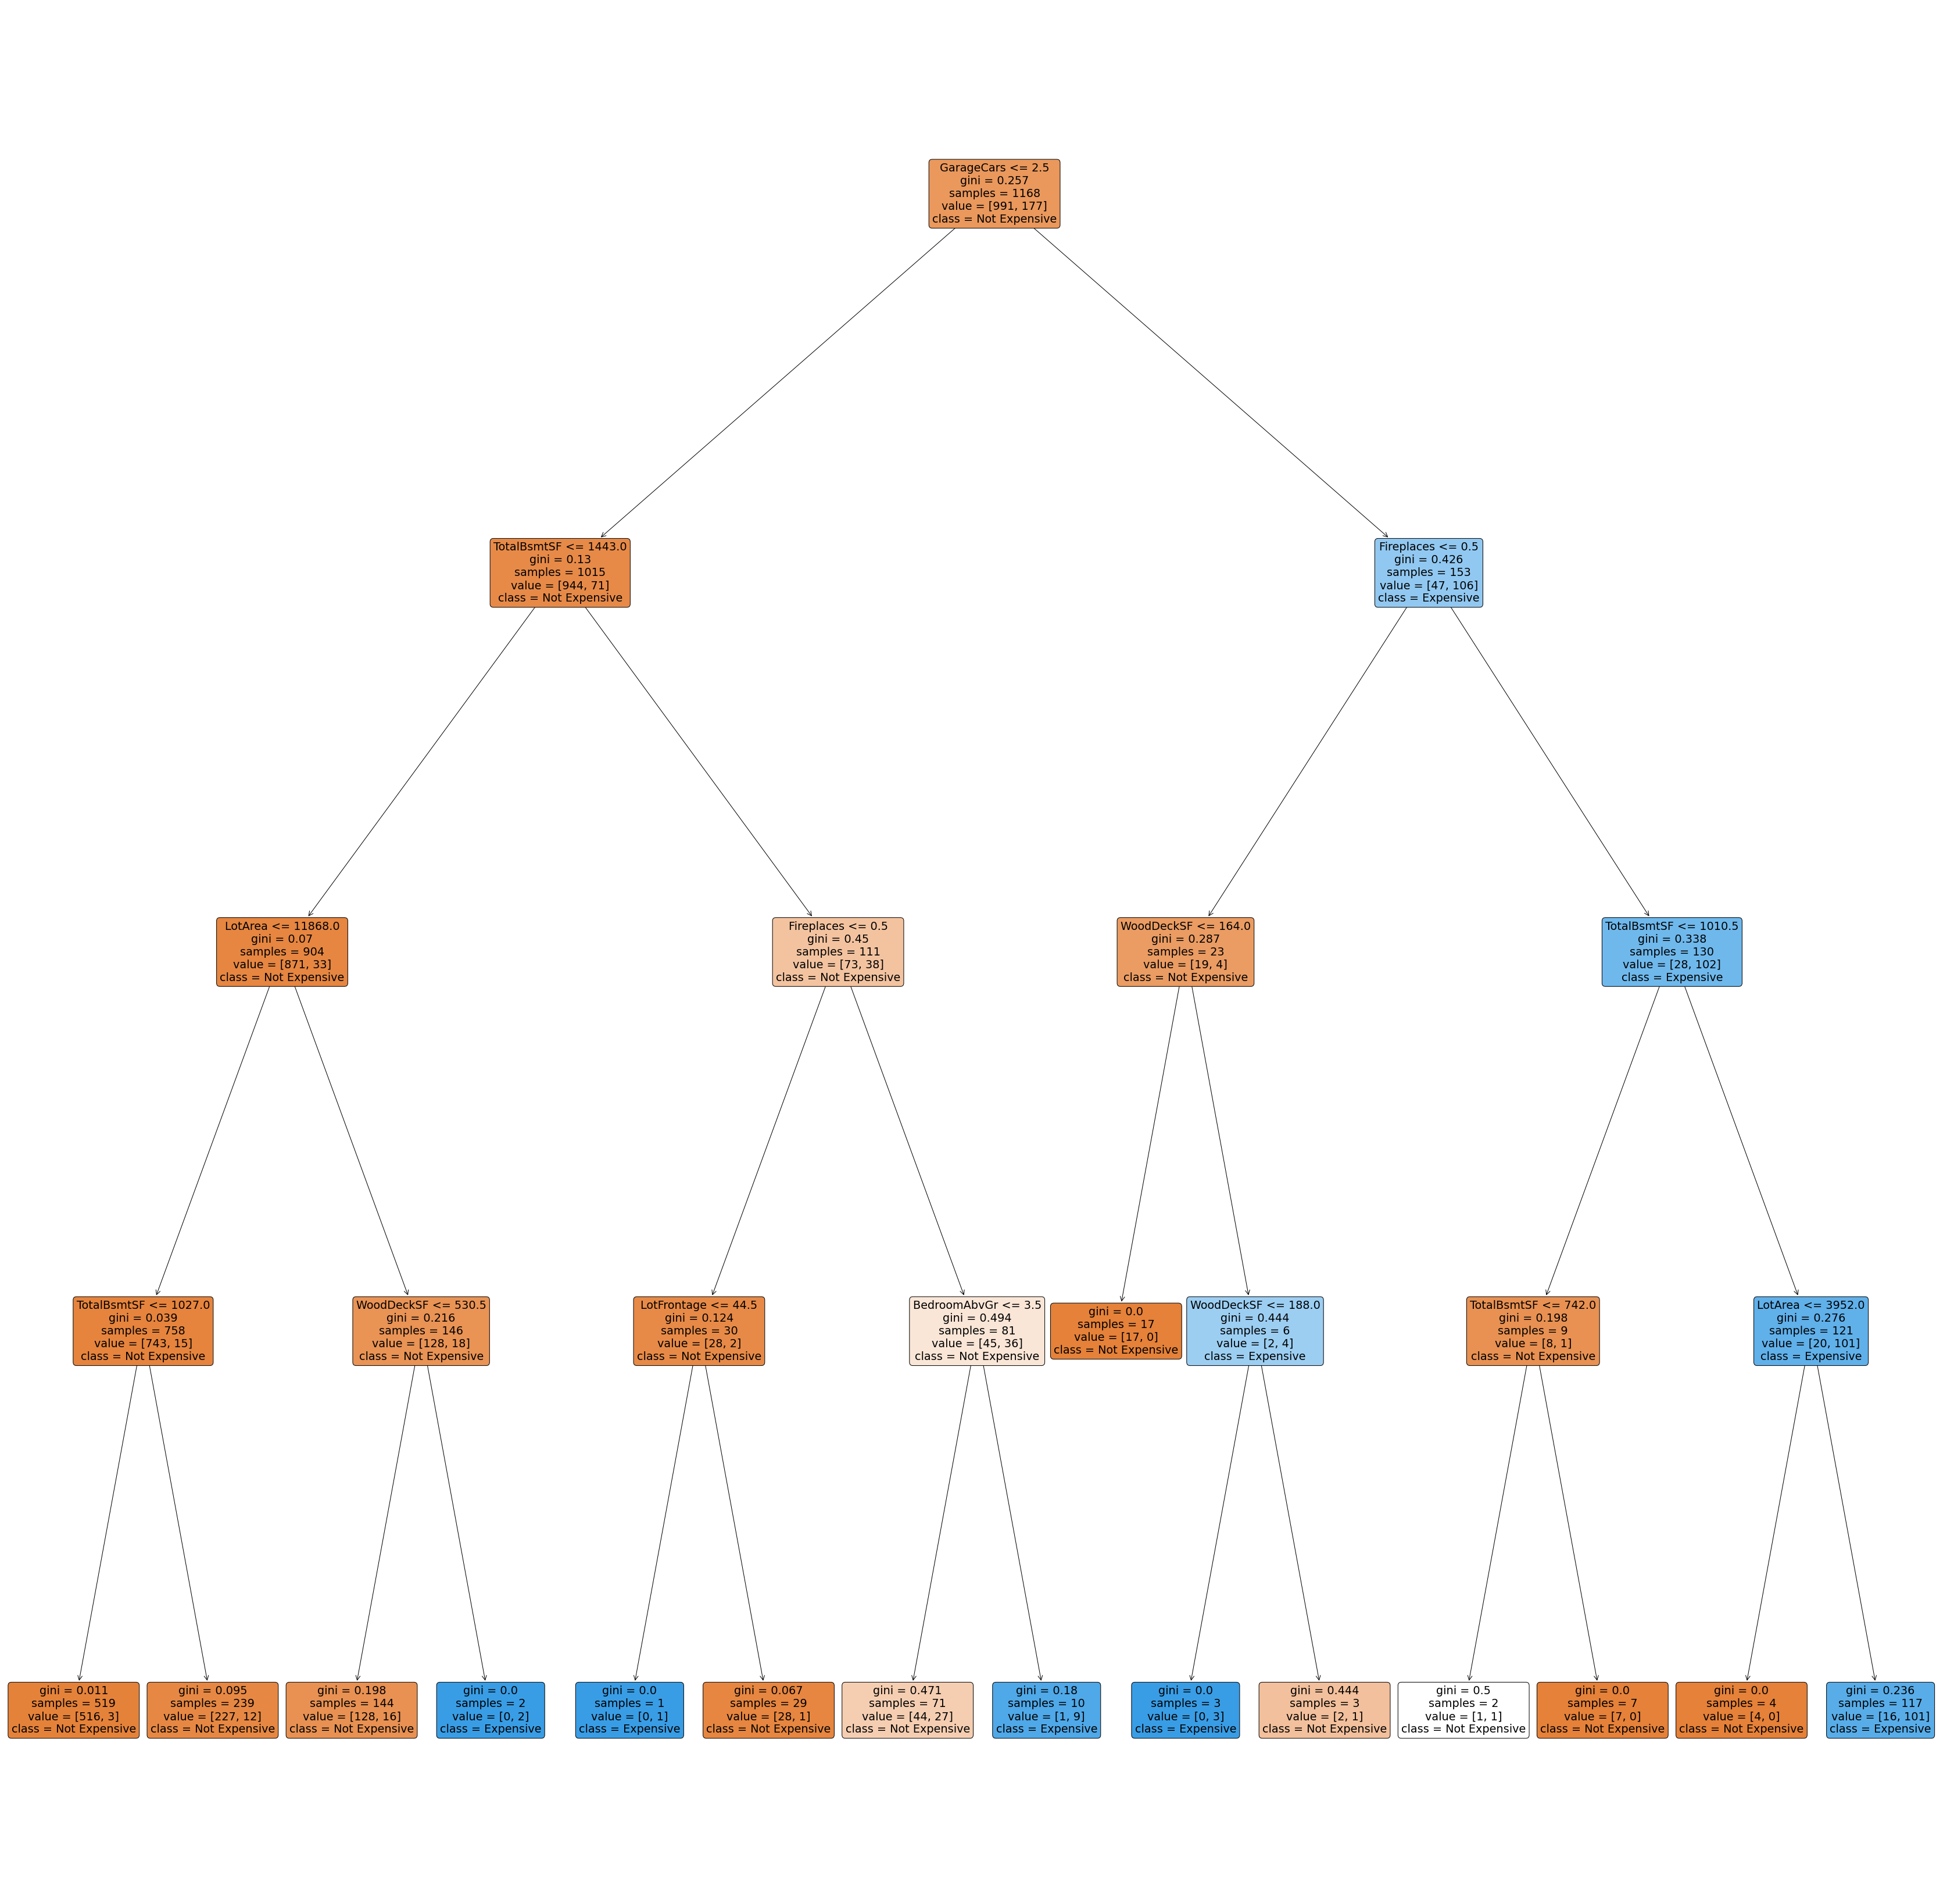

In [ ]:
plt.figure(figsize=(60,60))

plot_tree(
     my_tree,
     filled=True, 
     rounded=True, 
     class_names=['Not Expensive','Expensive'], 
     feature_names=X.columns
     );

So far, we have **explored the data** (by checking no. of rooms and area)and assumed 0 for not expensive and 1 for expensive. Then we made **intuition model** and checked whether our assumptions are correct or not. After that we made our first iterration that is build the **Decision Tree model** and also **imputed any missing values** with mean and again tested our model using test data. The **accuracy score** seems abrupt and our model got complex. To make the model simpler then we did **pruning(post  pruning)** and had **tuning** the parameter such as set maximium depth to 4. After this we are not sure that whether our maximum depth 4 is best or not and to manually itereate it over and over will be very length process. So to overcome this we use **pipelines** to automate this whole process. After initialising the pipeline we use **grid search cross validation**. In Kfold cross validation we divide our training set into Knumber of chunks. In this, we pass a **combination of parameters** to K chunks. For example, we have 5 K chunks for them we will pass 5 different combination of parameters and see which K chunk accuracy score(performance of model). If the combination of parameters for 3 chunks are same then we take average of estimated accuracy score. Then again we pass d**ifferent combination of parameters** to the remaining k chunks and then we will finally look for the **best accuracy score** among all of them. After selecting the best accuracy score (of course its relevent parameter combination) we then furter train our model using our winning combination of parameters. The **GridSearchCV** by default gives the best model(the model with best accuracy.)

# Using the pipeline

Let's pipeline everything from imputing to use different parameters in decision tree classifier.

In [ ]:
from sklearn.pipeline import make_pipeline

# 1. initialize transformers & model
imputer = SimpleImputer(strategy="median")   
dtree = DecisionTreeClassifier(max_depth=6)
 
# 2. Create a pipeline*
pipe = make_pipeline(imputer, dtree)
# 3. Fit the pipeline to the training data
pipe.fit(X_train, y_train)
 
# 4. Use the pipeline to make predictions
pipe.predict(X_test)
 


# Using GridsearchCV to find the best parameters
So far, we tuned the hyperparameters of the decision tree manually. This is not ideal, for two reasons:

* It's not efficient in terms of quickly finding the best combination of parameters.
* If we keep checking the performance on the test set over and over again, we might end up creating a model that fits that particular test set, but does not generalize as well with new data. Test sets are meant to reamain unseen until the very last moment of ML development —we have been cheating a bit!



Grid Search Cross Validation solves both issues.


Check the docs: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

## Complete pipeline

In [ ]:
# 1. initialize transformers & model
imputer = SimpleImputer()   
dtree = DecisionTreeClassifier()
 
# 2. Create a pipeline*
pipe = make_pipeline(imputer, dtree)



# list of values for different parameters to be used in decision tree are defined in python dictionary
param_grid = {
     "simpleimputer__strategy":["mean", "median"],
     "decisiontreeclassifier__max_depth": range(2, 12),
    "decisiontreeclassifier__min_samples_leaf": range(3, 10, 2),
    "decisiontreeclassifier__min_samples_split": range(3, 40, 5),
    "decisiontreeclassifier__criterion":["gini", "entropy"]
    }


# importing GridSearchCV
from sklearn.model_selection import GridSearchCV
search = GridSearchCV(pipe, # you have defined this beforehand
                      param_grid, # your parameter grid
                      cv=5, # the value for K in K-fold Cross Validation
                      scoring='accuracy', # the performance metric to use, 
                      verbose=1) # we want informative outputs during the training process


In [ ]:
search.fit(X_train, y_train)


Fitting 5 folds for each of 1280 candidates, totalling 6400 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': range(2, 12),
                         'decisiontreeclassifier__min_samples_leaf': range(3, 10, 2),
                         'decisiontreeclassifier__min_samples_split': range(3, 40, 5),
                         'simpleimputer__strategy': ['mean', 'median']},
             scoring='accuracy', verbose=1)

In [ ]:
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.930):
{'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 5, 'decisiontreeclassifier__min_samples_leaf': 3, 'decisiontreeclassifier__min_samples_split': 38, 'simpleimputer__strategy': 'mean'}


Now let's train the model again with the best parameters we have got.

In [ ]:
from sklearn.impute import SimpleImputer

# initialize
my_imputer = SimpleImputer(strategy='mean')

# fit
my_imputer.fit(X_train)

# transform train 
X_imputed_train = my_imputer.transform(X_train)

In [ ]:
# 1. import the model
from sklearn.tree import DecisionTreeClassifier

# 2. initialize the model (optional: give some parameters)
my_tree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, min_samples_split = 38, splitter="best")

# 3. fit the model to the train data
my_tree.fit(X = X_imputed_train, 
            y = y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=38)

In [ ]:
y_train_pred = search.predict(X_train)

accuracy_score(y_train, y_train_pred)

0.9426369863013698

In [ ]:
# Calculating model accuracy from the results of search grid

y_train_pred = search.predict(X_train)

from sklearn.metrics import accuracy_score

train_accuracy2 = accuracy_score(y_true = y_train,
        y_pred = y_train_pred
        )

round(train_accuracy2, 5) 

0.94264

In [ ]:
y_test_pred = search.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

test_accuracy2 = accuracy_score(y_true = y_test,
                                 y_pred = y_test_pred
                                 )

round(test_accuracy2, 5)

0.93151

In [ ]:
plt.figure(figsize=(60,60))

plot_tree(
     my_tree,
     filled=True, 
     rounded=True, 
     class_names=['Not Expensive','Expensive'], 
     feature_names=X.columns
     );

# Adding a Scaler to pipeline

In [ ]:
from sklearn.preprocessing import StandardScaler

# initialize transformers &amp; model
imputer = SimpleImputer()
scaler = StandardScaler() # scaler
dtree = DecisionTreeClassifier()

# create the pipeline
pipe = make_pipeline(imputer,
                     scaler,
                     dtree)

# create parameter grid
param_grid = {
    "simpleimputer__strategy":["mean", "median"],
    "standardscaler__with_mean":[True, False],
    "standardscaler__with_std":[True, False],
    "decisiontreeclassifier__max_depth": range(2, 14),
    "decisiontreeclassifier__min_samples_leaf": range(3, 10),
    "decisiontreeclassifier__criterion":["gini", "entropy"]
}

# define cross validation
search = GridSearchCV(pipe,
                      param_grid,
                      cv=10,
                      verbose=1)

# fit
search.fit(X_train, y_train)

# cross validation average accuracy
search.best_score_

Fitting 10 folds for each of 1344 candidates, totalling 13440 fits


0.9280946065428826

In [ ]:
# best parameters
search.best_params_

{'decisiontreeclassifier__criterion': 'entropy',
 'decisiontreeclassifier__max_depth': 6,
 'decisiontreeclassifier__min_samples_leaf': 4,
 'simpleimputer__strategy': 'mean',
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True}